## Stock Market Analysis Project
I will be analyzing the automotive industry company from Jan 1 2014 to Jan 1 2019. This is not a financial advice, it is mainly just to show how data could  easily be extracted, calculated ,visualized and interpreted for making investment decisions.

### 1.Library

In [35]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix #optional
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data Extraction

In [19]:
start=datetime.datetime(2015,1,1)
end=datetime.datetime(2020,1,1)
TSLA=web.DataReader("TSLA",'yahoo',start,end)
GM=web.DataReader("GM",'yahoo',start,end)
FORD=web.DataReader("F",'yahoo',start,end)

### 3. Data Visualization


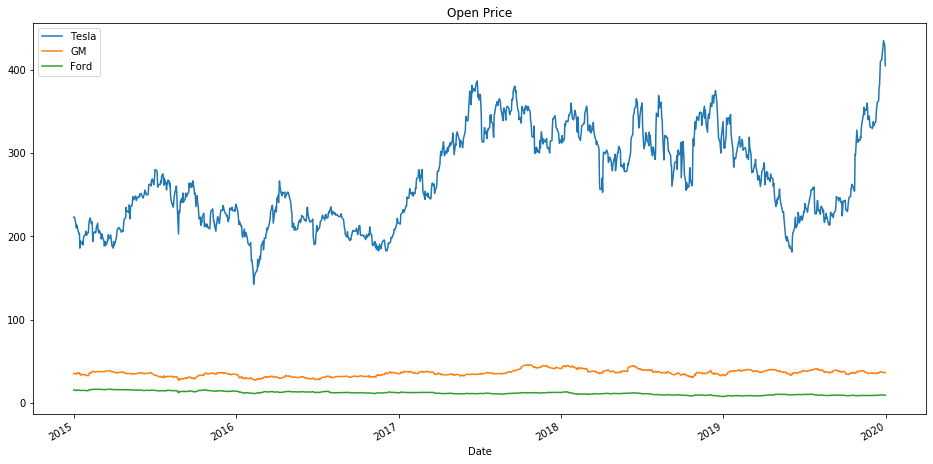

In [26]:
TSLA['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
GM['Open'].plot(label='GM',figsize=(16,8))
FORD['Open'].plot(label='Ford',figsize=(16,8))
plt.legend()

From the figure above, we can see that Tesla looks like its always been much more valuable as a company than GM and Ford. Yet, to really understand this we need to take into consideration the market capitalization of the company.

#### Next, we would try to analyze the volume traded in each company

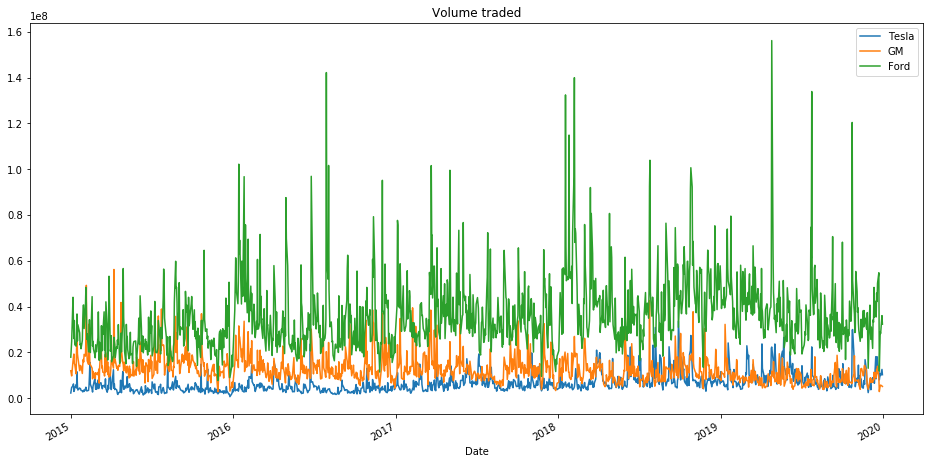

In [22]:
TSLA['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume traded')
GM['Volume'].plot(label='GM',figsize=(16,8))
FORD['Volume'].plot(label='Ford',figsize=(16,8))
plt.legend()

From the figure above, you can see there is a big spike in volume traded in around 2019. To get the exact date for the maximum volume traded, we can use the code as follows:

In [30]:
print(FORD['Volume'].argmax()) #will return the index position
FORD.index[1086]

1086


Timestamp('2019-04-26 00:00:00')

In 2019-04-26 indeed there was a major news on Ford. Ford Says the U.S. Justice Dept has opened a criminal inquiry into Ford emissions certification process.

#### To better understand each company, we will look into the market cap. However, since our data does not have any information regarding the total shares, we will look only on the total money traded as a representation.

In [31]:
TSLA['Total Traded']=TSLA['Volume']*TSLA['Open']
FORD['Total Traded']=FORD['Volume']*FORD['Open']
GM['Total Traded']=GM['Volume']*GM['Open']

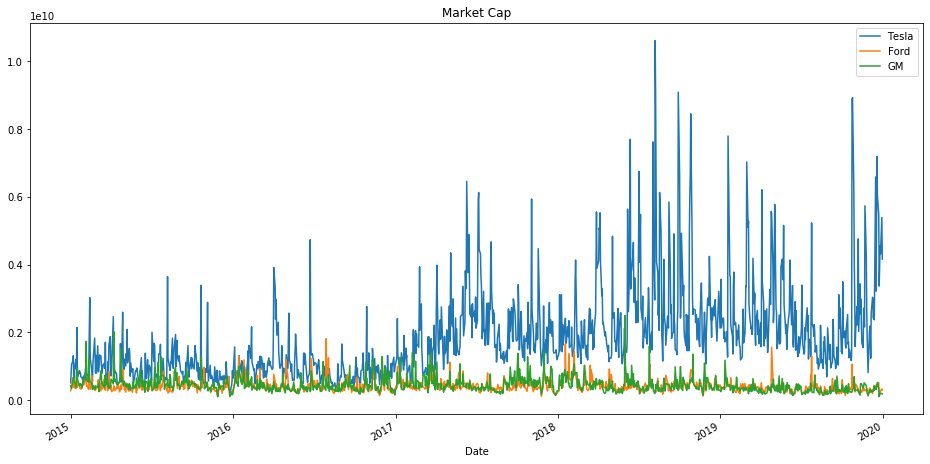

In [32]:
TSLA['Total Traded'].plot(label='Tesla',figsize=(16,8),title="Market Cap")
FORD['Total Traded'].plot(label='Ford')
GM['Total Traded'].plot(label='GM')
plt.legend()

We can see overall, Tesla is still a much more valuable company. However, individual need to also take into account the high volatility introduced by Tesla when making investment decision.

#### Moving averages
We would only use the GM stocks for the implementation. 

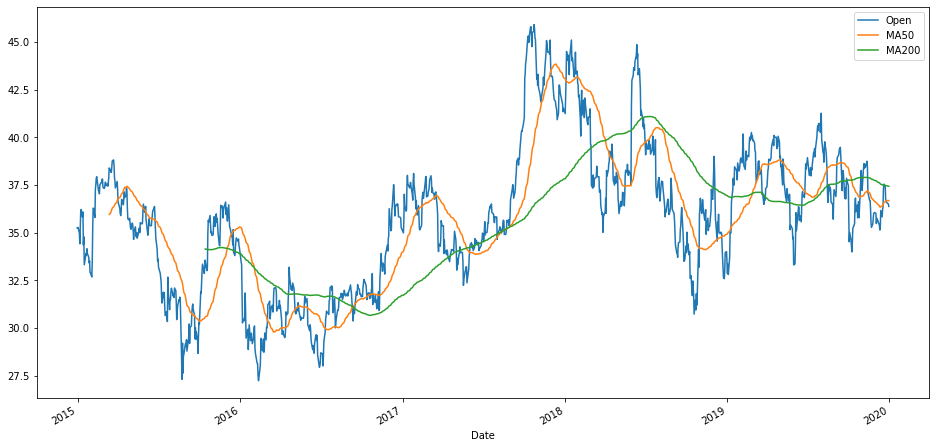

In [33]:
GM['MA50']=GM['Open'].rolling(50).mean()
GM['MA200'] = GM['Open'].rolling(200).mean()
GM[['Open','MA50','MA200']].plot(label='GM',figsize=(16,8))

 From the moving average, you can see the if the current stock price is above/lower then the previous average. Furthermore, you can also use this to make your investment decision. For example, Moving Average can be used as a support level to buy or utilized MA with different time frame and look for crossover.

#### Relationship between these stocks through a scatter matrix plot.

In [36]:
car_comp=pd.concat([TSLA['Open'],GM['Open'],FORD['Open']],axis=1)

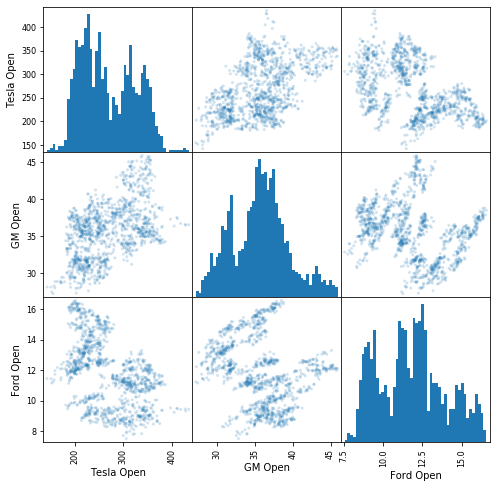

In [38]:
car_comp.columns=['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

### 4. Financial Analysis
We will mainly convert mathematical equation in finance into code using python and create some plots.

#### Daily percentage Change
$ r_t = \frac{p_t}{p_{t-1}} -1$

In [43]:
TSLA['returns']=(TSLA['Close']/TSLA['Close'].shift(1))-1 #manual
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2014-12-31,225.679993,222.250000,223.089996,222.410004,2297500,222.410004,5.125493e+08,NaN
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,1.061842e+09,-0.013938
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,1.151812e+09,-0.042041
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,1.315375e+09,0.005664
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,6.333082e+08,-0.001562


In [53]:
FORD['returns']=FORD['Close'].pct_change(1) # a builtin function
FORD.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2014-12-31,15.64,15.47,15.51,15.50,17930200.0,11.781535,2.780974e+08,NaN
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.675119,3.862875e+08,-0.009032
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,11.219061,6.664851e+08,-0.039062
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,11.112647,4.907662e+08,-0.009485
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,11.431887,3.852451e+08,0.028728


In [52]:
GM['returns']=GM['Close'].pct_change(1)
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2014-12-31,35.450001,34.889999,35.240002,34.910000,12004200.0,27.650375,4.230280e+08,NaN,NaN,NaN
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.594938,3.441188e+08,NaN,NaN,-0.002005
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.190994,5.674805e+08,NaN,NaN,-0.014638
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.602859,6.106949e+08,NaN,NaN,0.015147
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.386992,6.806154e+08,NaN,NaN,0.028408


#### Measuring volatility of each company returns using different type of charts

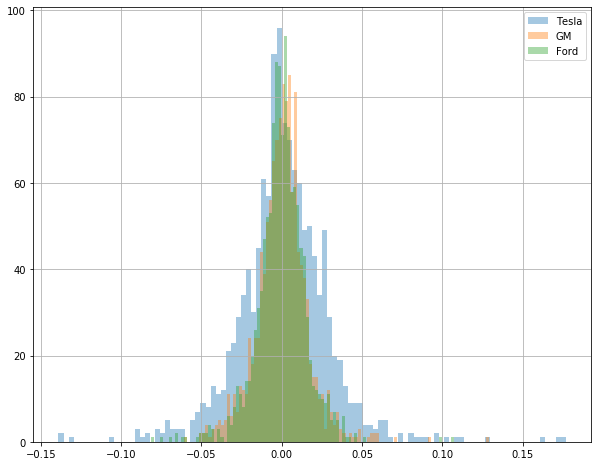

In [48]:
TSLA['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4) #histogram
GM['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
FORD['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.4)
plt.legend()

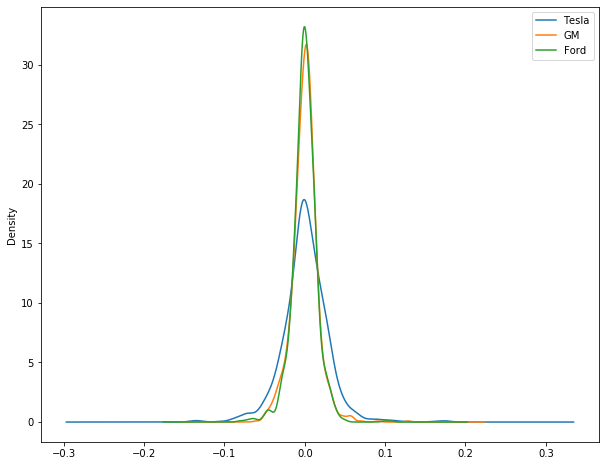

In [49]:
TSLA['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
GM['returns'].plot(kind='kde',label='GM',figsize=(10,8))
FORD['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
plt.legend()

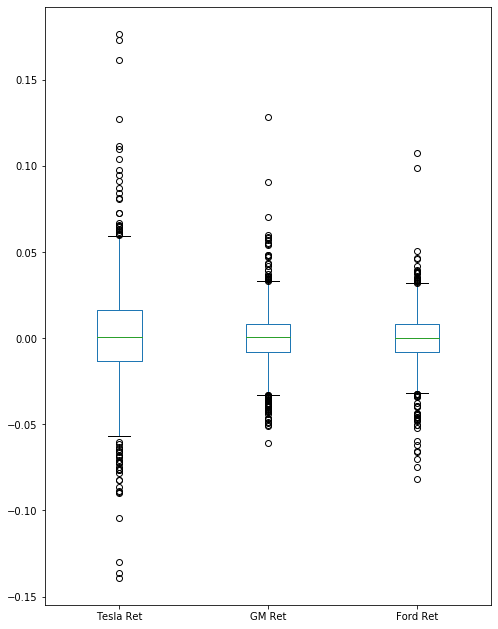

In [59]:
#in boxplot you need to have all the column in the same dataframe
box_df=pd.concat([TSLA['returns'],GM['returns'],FORD['returns']],axis=1)
box_df.columns=['Tesla Ret','GM Ret','Ford Ret']
box_df.plot(kind='box',figsize=(8,11))

#### Comparing Daily Returns between Stock
To see the corelation between each stock. Also to figure about the debate that is tesla being treated as a technology company rather than a car company.

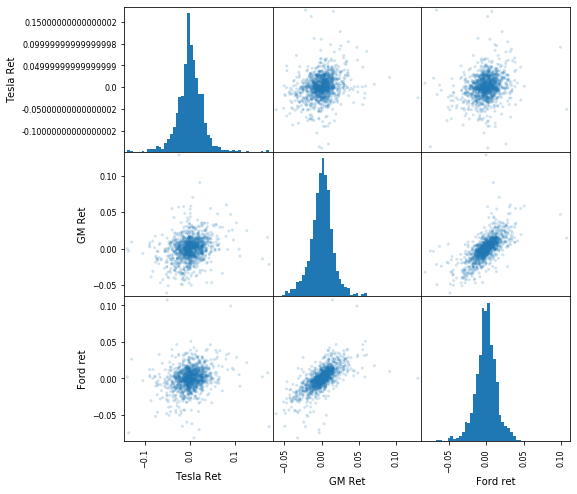

In [54]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

From the figure above, we can see that tesla is the most volatile and wide raging. In addition, we can see that GM and Ford have a somehow linear relationship. The detail are as follows:

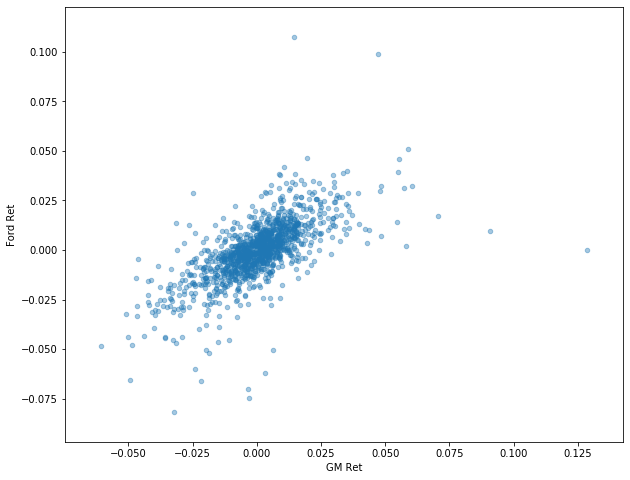

In [60]:
box_df.plot(kind='scatter',x='GM Ret',y='Ford Ret',alpha=0.4,figsize=(10,8))

#### Cumulative daily Returns
Formula : $ i_i = (1+r_t) * i_{t-1} $

In [65]:
TSLA['Cumulative Return'] = (1 + TSLA['returns']).cumprod()
FORD['Cumulative Return'] = (1 + FORD['returns']).cumprod()
GM['Cumulative Return'] = (1 + GM['returns']).cumprod()#cumprod, nuilin function by panda

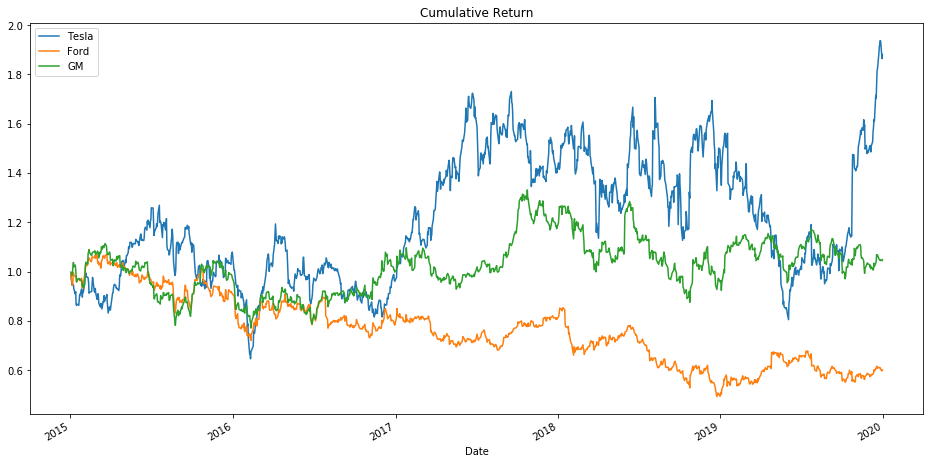

In [66]:
TSLA['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
FORD['Cumulative Return'].plot(label='Ford')
GM['Cumulative Return'].plot(label='GM')
plt.legend()

We can see in the first 3 years the return between 3 stocks was pretty much volatile. However, starting 2017, Tesla stock soars and remain above GM and Ford;attain its maximum in Jan 2020. 

## By this basic analysis, you can easily extract, calculate, analyze and visualize data to find the best stocks among its peers.